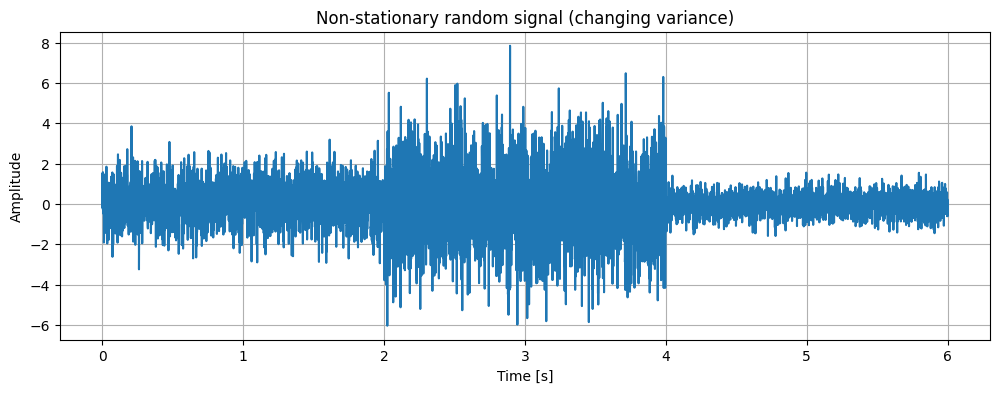

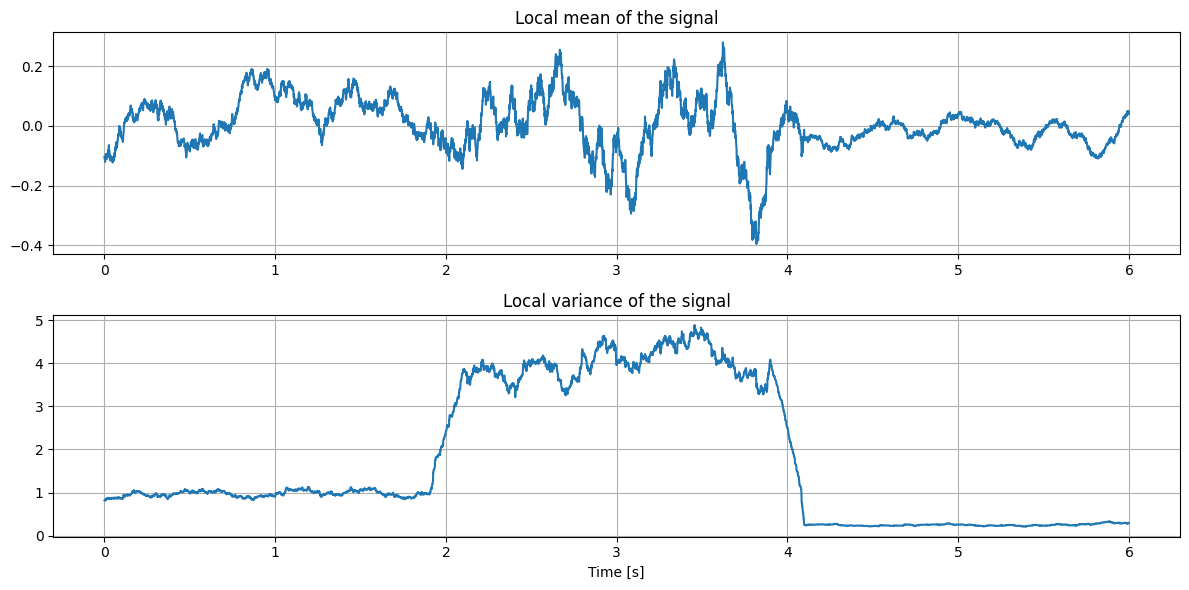

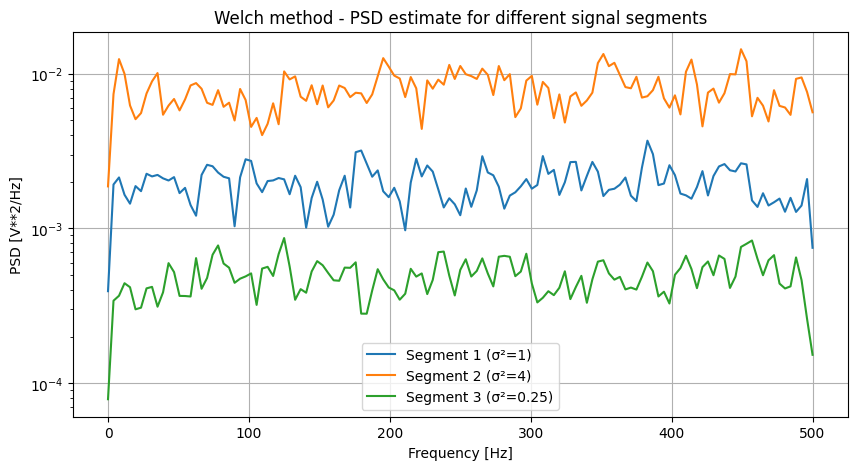

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch
from scipy.ndimage import uniform_filter1d

# Signal parameters
fs = 1000       # Sampling frequency
duration = 6    # Duration in seconds
N = fs * duration  # Total number of samples

# Generate a signal with different variances in segments
np.random.seed(42)
segment_lengths = [N // 3] * 3
variances = [1.0, 4.0, 0.25]  # sigma^2 for each segment
signal = np.concatenate([
    np.random.normal(0, np.sqrt(variances[i]), segment_lengths[i]) for i in range(3)
])

t = np.linspace(0, duration, N, endpoint=False)

# Plot the non-stationary signal
plt.figure(figsize=(12, 4))
plt.plot(t, signal, label='Random signal (non-stationary)')
plt.title("Non-stationary random signal (changing variance)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

# Compute local mean and variance using a sliding window
window_size = 200  # in samples

local_mean = uniform_filter1d(signal, size=window_size)
local_var = uniform_filter1d(signal**2, size=window_size) - local_mean**2

# Plot local statistics
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, local_mean)
plt.title("Local mean of the signal")
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t, local_var)
plt.title("Local variance of the signal")
plt.xlabel("Time [s]")
plt.grid(True)
plt.tight_layout()
plt.show()

# Split the signal into segments and apply Welch’s method
segment_samples = N // 3
f, Pxx1 = welch(signal[:segment_samples], fs=fs, nperseg=256)
f, Pxx2 = welch(signal[segment_samples:2*segment_samples], fs=fs, nperseg=256)
f, Pxx3 = welch(signal[2*segment_samples:], fs=fs, nperseg=256)

# Plot PSD estimates for each segment
plt.figure(figsize=(10, 5))
plt.semilogy(f, Pxx1, label='Segment 1 (σ²=1)')
plt.semilogy(f, Pxx2, label='Segment 2 (σ²=4)')
plt.semilogy(f, Pxx3, label='Segment 3 (σ²=0.25)')
plt.title('Welch method - PSD estimate for different signal segments')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.legend()
plt.grid(True)
plt.show()
